In [1]:
import numpy as np
import pandas as pd
import time
import datetime
import matplotlib.pyplot as plt
%matplotlib inline  


In [81]:
symbol_us = 'GOOGL'
symbol_other = '9988.HK'
df_us = pd.read_csv(f'stock_data/{symbol_us}.csv',header=0, index_col=0, parse_dates=True)
df_other = pd.read_csv(f'stock_data/{symbol_other}.csv',header=0, index_col=0, parse_dates=True)

In [3]:
df_us.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-04-29,119.461502,120.208000,118.692497,119.638000,119.638000,41234000
2021-04-30,118.401001,119.092499,117.328003,117.675003,117.675003,44856000
2021-05-03,118.245499,119.077499,116.775002,117.153999,117.153999,28242000
2021-05-04,115.677498,116.249496,112.834000,115.341499,115.341499,44818000
2021-05-05,116.431503,116.750000,115.414001,115.738503,115.738503,26636000


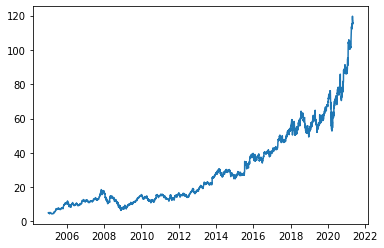

In [4]:
plt.plot(df_us['Close'])

# In this step, we try to predict the "open", "high", "Low" and "close" values by looking at yesterday's values

In [26]:
from sklearn import preprocessing
from sklearn import linear_model

In [27]:
n = int(len(df_us)*0.7)
y_train = df_us.iloc[1:n][['Open','High','Low','Close']]
x_train = df_us.iloc[0:n-1][['Open', 'High','Low','Volume','Close']]
y_test = df_us.iloc[n:][['Open','High','Low','Close']]
x_test = df_us.iloc[n-1:-1][['Open', 'High','Low','Volume','Close']]

In [59]:
reg = linear_model.LinearRegression().fit(x_train,y_train)
results = pd.DataFrame(data=reg.coef_,columns=['Open', 'High','Low','Volume','Close'],index=['Open','High','Low','Close'])

results['Intercept'] = reg.intercept_
print('linear regression coefficient are:\n',results)

y_pred = pd.DataFrame(data=reg.predict(x_test),index=y_test.index,columns=['Open', 'High','Low','Close'])
print('\nPredicted values are:\n', y_pred.head())
print('\nTarget values are:\n', y_test[['Open', 'High','Low','Close']].head())

score = 1-np.sum((y_pred-y_test)**2,axis=0)/np.sum((y_test-y_test.mean(axis=0))**2,axis=0)
print('\n The below table shows R2 linear regression for each of the next day:\n',score)

linear regression coefficient are:
            Open      High       Low        Volume     Close  Intercept
Open  -0.171659  0.197925  0.061042  2.480002e-11  0.913071  -0.011945
High  -0.189248  0.412143 -0.081720  4.163914e-11  0.863031   0.019304
Low   -0.102328 -0.195620  0.293694 -1.786007e-11  1.000239  -0.004364
Close -0.134377  0.107212  0.170502  4.290165e-12  0.857267   0.012404

Predicted values are:
                  Open       High        Low      Close
Date                                                  
2016-06-10  37.170950  37.407460  36.897922  37.153781
2016-06-13  36.694124  36.951936  36.390864  36.687372
2016-06-14  36.678352  36.942809  36.352943  36.663072
2016-06-15  36.705530  36.958627  36.404597  36.680846
2016-06-16  36.634967  36.863710  36.382329  36.644877

Target values are:
                  Open       High        Low      Close
Date                                                  
2016-06-10  36.797501  36.981998  36.525501  36.659500
2016-06-13  36

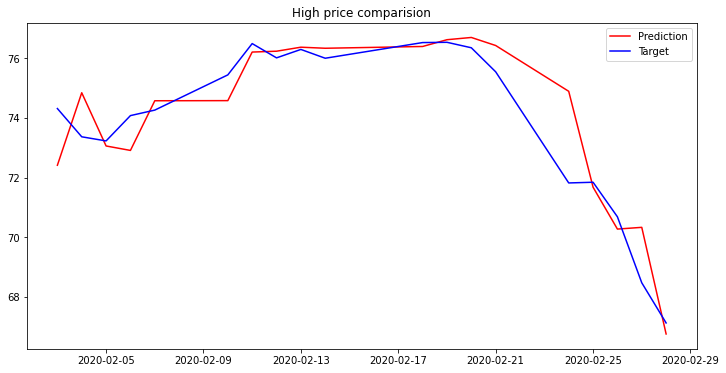

In [60]:
plt.figure(figsize=(12,6))
plt.plot(y_pred.loc['2020-02-01':'2020-03-01']['High'],'r')
plt.plot(y_test.loc['2020-02-01':'2020-03-01']['High'],'b')
plt.legend(['Prediction','Target'])
plt.title('High price comparision')
plt.show()

In [62]:
mse = np.sum((y_pred.loc['2020-02-01':'2020-03-01']-y_test.loc['2020-02-01':'2020-03-01'])**2,axis=0)/len(y_pred.loc['2020-02-01':'2020-03-01'])
mse

Open     1.280712
High     1.181577
Low      1.958263
Close    2.455735
dtype: float64

In [63]:
y_pred.loc['2020-02-01':'2020-03-01']-y_test.loc['2020-02-01':'2020-03-01']

,Open,High,Low,Close
Date,,,,
2020-02-03,-1.380695,-1.901964,-2.108579,-2.521811
2020-02-04,1.560511,1.477725,2.414560,1.856043
2020-02-05,-0.824455,-0.169737,-0.114028,-0.118265
2020-02-06,-0.297458,-1.168037,-1.028288,-1.597945
2020-02-07,0.629376,0.313596,-0.079590,-0.125978
2020-02-10,0.230307,-0.863589,-0.307580,-1.425408
2020-02-11,-0.043105,-0.284214,-0.480108,-0.084733
2020-02-12,-0.117959,0.223184,-0.516619,-0.324934
2020-02-13,0.458992,0.075253,0.273299,0.263088


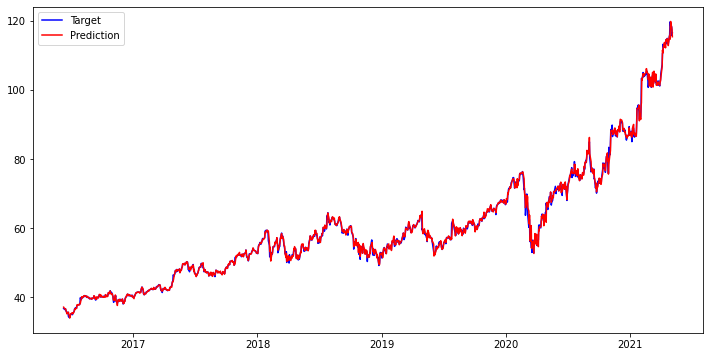

In [64]:
plt.figure(figsize=(12,6))
plt.plot(y_test['Open'],'b')
plt.plot(y_pred['Open'],'r')
plt.legend(['Target','Prediction'])
plt.show()

In [65]:
mse = np.sum((y_test['Open']-y_pred['Open'])**2,axis=0)/len(y_test['Open'])
r_squared = 1-np.sum((y_test['Open']-y_pred['Open'])**2,axis=0)/np.sum((y_test['Open']-y_test['Open'].mean())**2,axis=0)
print(f'Open Prediction: \n MSE: {mse}, R-Squared: {r_squared}')

Open Prediction: 
 MSE: 0.5280375837191666, R-Squared: 0.9981409594579491


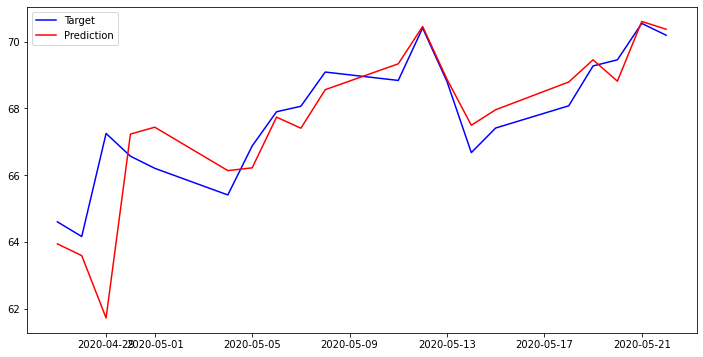

In [66]:
plt.figure(figsize=(12,6))
plt.plot(y_test.loc['2020-04-25':'2020-05-25']['Open'],'b')
plt.plot(y_pred.loc['2020-04-25':'2020-05-25']['Open'],'r')
plt.legend(['Target','Prediction'])

In [67]:
y_test['Open'].loc['2021-04-25':]

Date
2021-04-26    115.225998
2021-04-27    115.881500
2021-04-28    119.625000
2021-04-29    119.461502
2021-04-30    118.401001
2021-05-03    118.245499
2021-05-04    115.677498
2021-05-05    116.431503
Name: Open, dtype: float64

In [68]:
np.sum((y_test['Open'].loc['2021-04-25':]-y_test['Open'].loc['2021-04-25':].mean())**2,axis=0)

21.8465698633978

In [69]:
mse = np.sum((y_test['Open'].loc['2020-04-25':]-y_pred['Open'].loc['2020-04-25':])**2,axis=0)/len(y_test['Open'].loc['2020-04-25':])
r_squared = 1-np.sum((y_test['Open'].loc['2020-04-25':]-y_pred['Open'].loc['2020-04-25':])**2,axis=0)/np.sum((y_test['Open'].loc['2020-04-25':]-y_test['Open'].loc['2020-04-25':].mean())**2,axis=0)
print(f'Open Prediction from 2021-04-25 to 2021-05-24: \n MSE: {mse}, R-Squared: {r_squared}')

Open Prediction from 2021-04-25 to 2021-05-24: 
 MSE: 1.1046753587846703, R-Squared: 0.9945253626991811


In [70]:
y_test['Open'].loc['2021-04-27':].values

array([115.8815  , 119.625   , 119.461502, 118.401001, 118.245499,
       115.677498, 116.431503])

In [71]:
np.sum((y_test['Open'].loc['2021-04-27':].values-y_test['Open'].loc['2021-04-26':'2021-05-04'].values)**2,axis=0)

22.782202637038967

### In this step, we try to predict the "High" value by looking at yesterday's values and today's 'Open'

In [72]:
n = int(len(df_us)*0.8)
y_train = df_us.iloc[1:n][['High']]
yesterday_train=df_us.iloc[0:n-1][['Open', 'High','Low','Volume','Close']].values
today_train=df_us.iloc[1:n][['Open']].values
x_train = np.concatenate((yesterday_train,today_train),axis=1)

y_test = df_us.iloc[n+1:][['High']]
yesterday_test=df_us.iloc[n-1:-2][['Open', 'High','Low','Volume','Close']].values
today_test=df_us.iloc[n+1:][['Open']].values
x_test = np.concatenate((yesterday_test,today_test),axis=1)

In [73]:
reg = linear_model.LinearRegression().fit(x_train,y_train)
results = pd.DataFrame(data=reg.coef_,columns=['Open', 'High','Low','Volume','Close','Today-Open'])
results['Intercept'] = reg.intercept_
print(results)
score = reg.score(x_test,y_test)
print(f'score for test:{score}')
y_pred = pd.DataFrame(data=reg.predict(x_test),index=y_test.index,columns=y_test.columns)


       Open      High       Low        Volume     Close  Today-Open  Intercept
0 -0.053559  0.238523 -0.109858  1.228700e-11 -0.055179    0.983503   0.039596
score for test:0.9981600419264458


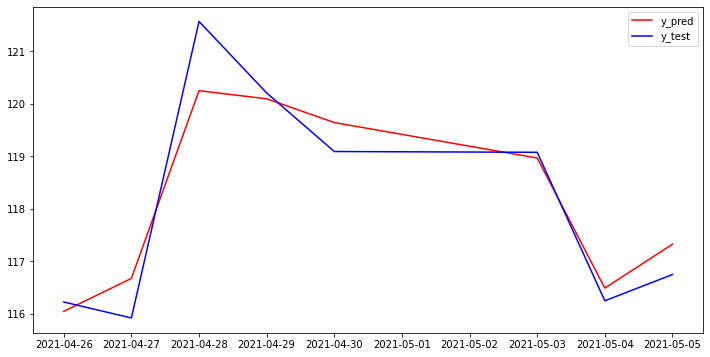

In [74]:
plt.figure(figsize=(12,6))
plt.plot(y_pred.loc['2021-04-25':],'r')
plt.plot(y_test.loc['2021-04-25':],'b')
plt.legend(['y_pred','y_test'])
plt.show()

In [75]:
mse = np.sum((y_pred.loc['2021-04-25':]-y_test.loc['2021-04-25':])**2,axis=0)/len(y_pred.loc['2021-04-25':])
mse

High    0.382071
dtype: float64

#### Can we predict "High" value just by looking at "Open" value for today?

   Today-Open  Intercept
0     1.00523   0.067738
score for test:0.9977968266984997


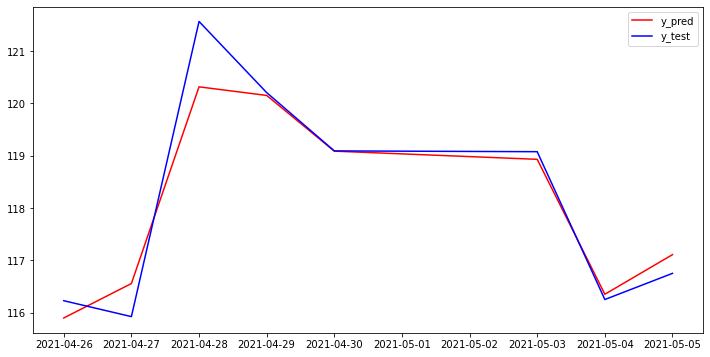

In [76]:
reg = linear_model.LinearRegression().fit(today_train,y_train)
results = pd.DataFrame(data=reg.coef_,columns=['Today-Open'])
results['Intercept'] = reg.intercept_
print(results)
score = reg.score(today_test,y_test)
print(f'score for test:{score}')
y_pred = pd.DataFrame(data=reg.predict(today_test),index=y_test.index,columns=y_test.columns)
plt.figure(figsize=(12,6))
plt.plot(y_pred.loc['2021-04-25':],'r')
plt.plot(y_test.loc['2021-04-25':],'b')
plt.legend(['y_pred','y_test'])
plt.show()

In [77]:
mse = np.sum((y_pred.loc['2021-04-25':]-y_test.loc['2021-04-25':])**2,axis=0)/len(y_pred.loc['2021-02-01':'2021-03-01'])
mse

High    0.11181
dtype: float64

#### It seems only by looking at "Open" we can predict "High"


### In this step, we try to predict the "Open" value by looking at yesterday's values for this market and today's value of HK market

In [82]:
same_index = df_us.index.intersection(df_other.index) # find days that are availables in both datasets
n = int(len(same_index)*0.8)
df_us_same = df_us.loc[same_index] # Part of US market that matches the other dataset
df_other_same = df_other.loc[same_index] # Part of US market that matches the other dataset

y_train = df_us_same.iloc[1:n][['Open','High','Low','Close']]
x_train_us = df_us_same.iloc[0:n-1][['Open', 'High','Low','Volume','Close']].values
x_train_other = df_other_same.iloc[1:n][['Open', 'High','Low','Volume','Close']].values
x_train = np.concatenate((x_train_us,x_train_other),axis=1)

y_test = df_us_same.iloc[n+1:][['Open','High','Low','Close']]
x_test_us = df_us_same.iloc[n-1:-2][['Open', 'High','Low','Volume','Close']].values
x_test_other = df_other_same.iloc[n+1:][['Open', 'High','Low','Volume','Close']].values
x_test = np.concatenate((x_test_us,x_test_other),axis=1)


In [83]:
reg = linear_model.LinearRegression().fit(x_train,y_train)
results = pd.DataFrame(data=reg.coef_,columns=['Open_ex-US','High_ex-US','Low_ex-US','Volume_ex_us','Close_ex-US','Open_today_other', 'High_today_other','Low_today_other','Volume_today_other','Close_today_other'])
results['Intercept'] = reg.intercept_
print(results.head())
y_pred = pd.DataFrame(data=reg.predict(x_test),index=y_test.index,columns=['Open', 'High','Low','Close'])
score = 1-np.sum((y_pred-y_test)**2,axis=0)/np.sum((y_test-y_test.mean(axis=0))**2,axis=0)
print('\n The below table shows R2 linear regression for each of the next day:\n',score)

   Open_ex-US  High_ex-US  Low_ex-US  Volume_ex_us  Close_ex-US  \
0   -0.496089    0.326178   0.656078  4.810793e-09     0.499501   
1   -0.403392    0.483737   0.391495  4.527051e-09     0.501825   
2   -0.427067    0.071271   0.912388  1.013989e-09     0.432654   
3   -0.504188    0.417076   0.937100  8.228797e-09     0.129527   

   Open_today_other  High_today_other  Low_today_other  Volume_today_other  \
0         -0.082804          0.031588        -0.025824       -5.066602e-09   
1         -0.080819          0.023656        -0.049444        7.574818e-09   
2         -0.085948          0.026761        -0.004056       -2.591154e-09   
3         -0.094970          0.078890        -0.076336       -2.251056e-09   

   Close_today_other  Intercept  
0           0.081423   0.169635  
1           0.114001   0.573466  
2           0.067026  -0.200271  
3           0.096284   0.555822  

 The below table shows R2 linear regression for each of the next day:
 Open     0.857968
High     0.81

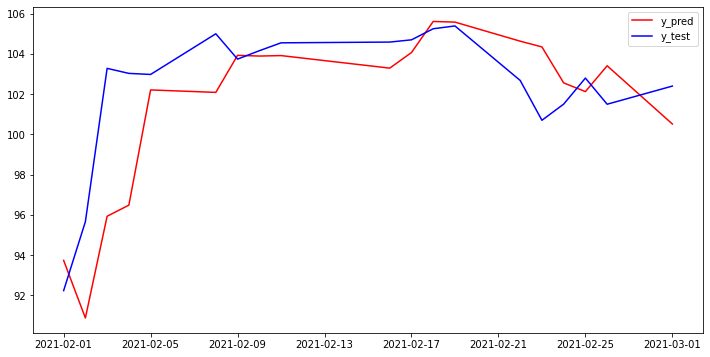

In [87]:
plt.figure(figsize=(12,6))
plt.plot(y_pred.loc['2021-02-01':'2021-03-01']['Open'],'r')
plt.plot(y_test.loc['2021-02-01':'2021-03-01']['Open'],'b')
plt.legend(['y_pred','y_test'])
plt.show()

In [85]:
mse = np.sum((y_pred.loc['2021-02-01':'2021-03-01']-y_test.loc['2021-02-01':'2021-03-01'])**2,axis=0)/len(y_pred.loc['2021-02-01':'2021-03-01'])
mse

Open     8.413992
High     8.332655
Low      7.980197
Close    7.532335
dtype: float64